In [1]:
# -*- coding: utf-8 -*-
from pylab import*
import matplotlib.pyplot as plt
from numpy import*
from matplotlib.pyplot import*
import pandas as pd
from iminuit import Minuit
from def_crs import*
from least_squares_lh import*
import time 
from fitter import*


/home/zackmrc/Documenti/git_project/lambda_fit/def_convolution_v3.1_survey_w_charm


In [2]:
y_lbl=48
x_lbl =50


ers_bar = 1.3  # dimensione barre errore
pnt_dat = 6 # dimensione punti

title_s=35 #dimensione titolo bin

fit_l=7  # dimensione linea fit
leg_sz=27

In [3]:
dati_exp=pd.read_csv("exp_data/lambda_had_global.dat", delimiter=r"\s+", header=0, engine='python')

In [4]:
coef=0.25
chi=1.65
model_numerator ='gauss'
dati_lp = pd.read_csv('fit_grid_plot/new_lines/dati_lp_conv_'+ str(coef)+'_chi_'+str(chi)+'_mdl_'+str(model_numerator)+'.csv')
dati_lk = pd.read_csv('fit_grid_plot/new_lines/dati_lk_conv_'+ str(coef)+'_chi_'+str(chi)+'_mdl_'+str(model_numerator)+'.csv')


In [5]:
dati_lp

,had1,had2,z1,z2,fit_line,conv,ffs1,ffs2,ffs3,ffs4
0,300.0,100.0,0.25,0.150000,-0.019969,-0.012188,0.023819,-0.033516,-0.000420,-0.002070
1,300.0,100.0,0.25,0.203571,-0.029360,-0.021331,0.034202,-0.052109,-0.000582,-0.002871
2,300.0,100.0,0.25,0.257143,-0.038314,-0.030902,0.042200,-0.069005,-0.000694,-0.003419
3,300.0,100.0,0.25,0.310714,-0.046510,-0.040173,0.048118,-0.083783,-0.000763,-0.003764
4,300.0,100.0,0.25,0.364286,-0.054074,-0.049308,0.052742,-0.097273,-0.000807,-0.003977
...,...,...,...,...,...,...,...,...,...,...
235,310.0,105.0,0.60,0.685714,-0.076762,-0.055723,-0.018946,0.006513,-0.007018,-0.036238
236,310.0,105.0,0.60,0.739286,-0.084714,-0.059132,-0.023752,0.008060,-0.007044,-0.036376
237,310.0,105.0,0.60,0.792857,-0.093754,-0.061003,-0.029531,0.009891,-0.006711,-0.034652
238,310.0,105.0,0.60,0.846429,-0.104251,-0.061169,-0.036488,0.012077,-0.005963,-0.030794


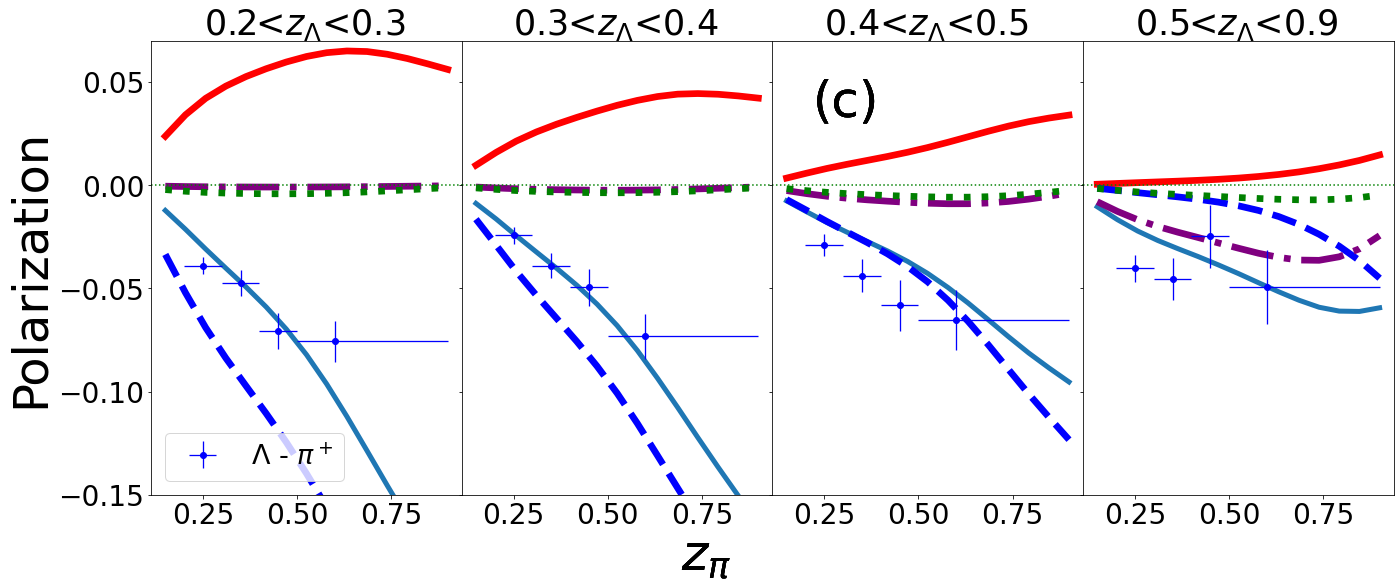

In [6]:
fig, axes = plt.subplots(1,4)
z1=[0.25,.35,.45,.6]
lim=[-0.15,0.07]
#lim=[-0.15,0.055]

ct=1

z_err =[[0.05,0.05,0.05,0.1],[0.05,0.05,0.05,0.3]]

for zs,ax in zip(z1,axes):
	
	#fig.suptitle('$\Lambda$ - $\pi^+$',fontsize=30)	
	dt = dati_lp.loc[(dati_lp['had1']==300) & (dati_lp['z1']==zs)& (dati_lp['had2']==100)]

	pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==100)]	

	ax=plt.subplot(1,4,ct)
	ax.plot(dt.z2,dt.conv,label='_nolegend_',linewidth=fit_l-2.)

	ax.plot(dt.z2,dt.ffs1,label='_nolegend_',linewidth=fit_l-0.3,linestyle='-',color='red')
	ax.plot(dt.z2,dt.ffs2,label='_nolegend_',linewidth=fit_l-0.3,linestyle='--',color='blue')
	ax.plot(dt.z2,dt.ffs3,label='_nolegend_',linewidth=fit_l-0.3,linestyle='-.',color='purple')
	ax.plot(dt.z2,dt.ffs4,label='_nolegend_',linewidth=fit_l-0.3,linestyle=':',color='green')  # (0, (3, 5, 1, 5, 1, 5))
	axhline(linewidth=1.5, ls=':', color='g')

	ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=6, color='blue',elinewidth=ers_bar, label= '$\Lambda$ - $\pi^+$')



	if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1.)
	if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1.)
	if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1.)
	if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1.)

	ax.tick_params(axis='both', which='major', labelsize=28)
	if ct >1: ax.set_yticklabels([])
	
	if ct ==1 :legend(loc='lower left', fontsize=leg_sz,frameon=True), ylabel('Polarization',size=y_lbl) 
	#if ct ==1 :ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
	ax.set_ylim(lim)
	ct+=1
	fig.text(0.5, 0.1, r'$z_{\pi}$', ha='center',size=x_lbl)
	fig.text(0.6, 0.7, '(c)', ha='center',size=x_lbl)
fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)


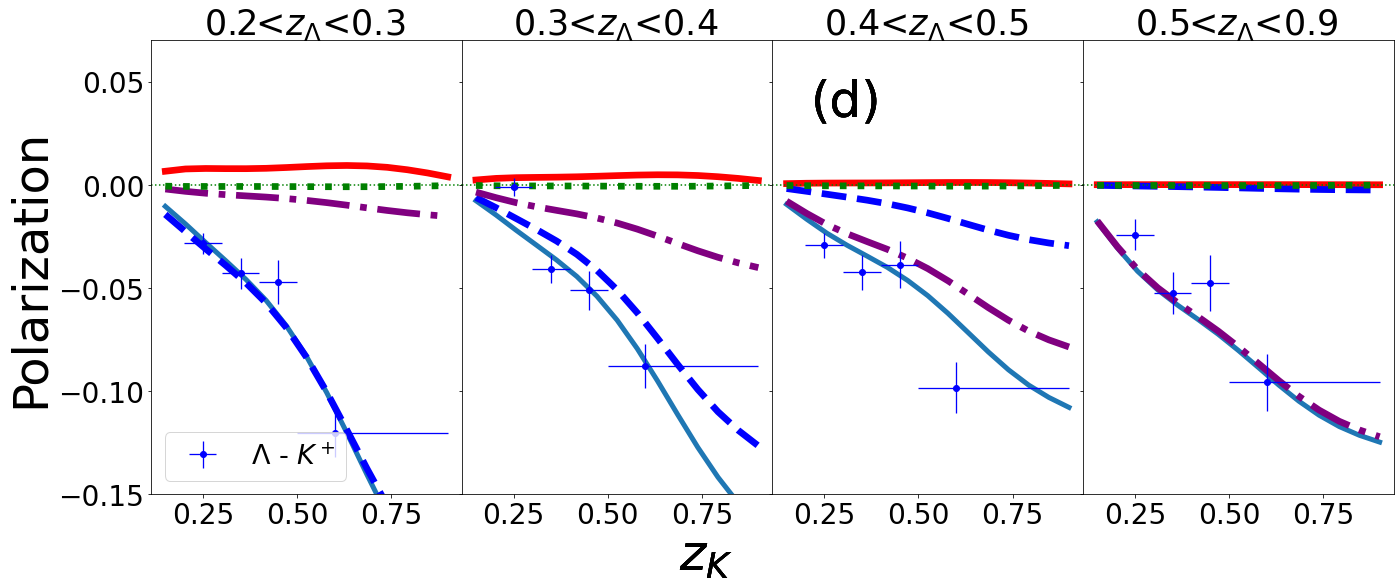

In [7]:
fig1, axes = plt.subplots(1,4)
z1=[0.25,.35,.45,.6]
#lim=[-0.10,0.055]
ct=1
for zs,ax in zip(z1,axes):
	#fig1.suptitle('$\Lambda$ - $K^+$',fontsize=30)	

	dt = dati_lk.loc[(dati_lk['had1']==300) & (dati_lk['z1']==zs)& (dati_lk['had2']==200)]

	pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==200)]	

	
	ax=plt.subplot(1,4,ct)
	ax.plot(dt.z2,dt.conv,label='_nolegend_',linewidth=fit_l-2.)

	ax.plot(dt.z2,dt.ffs1,label='_nolegend_',linewidth=fit_l-0.3,linestyle='-',color='red')
	ax.plot(dt.z2,dt.ffs2,label='_nolegend_',linewidth=fit_l-0.3,linestyle='--',color='blue')
	ax.plot(dt.z2,dt.ffs3,label='_nolegend_',linewidth=fit_l-0.3,linestyle='-.',color='purple')
	ax.plot(dt.z2,dt.ffs4,label='_nolegend_',linewidth=fit_l-0.3,linestyle=':',color='green')
	axhline(linewidth=1.5, ls=':', color='g')

	ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=6, color='blue',elinewidth=ers_bar, label= '$\Lambda$ - $K^+$')


	if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1.)
	if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1.)
	if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1.)
	if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1.)

	ax.tick_params(axis='both', which='major', labelsize=28)
	if ct >1: ax.set_yticklabels([])
	
	if ct ==1 :legend(loc='lower left', fontsize=leg_sz,frameon=True), ylabel('Polarization',size=y_lbl) 

	ax.set_ylim(lim)
	ct+=1
	fig1.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
	fig1.text(0.6, 0.7, '(d)', ha='center',size=x_lbl)
fig1.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig1.set_size_inches(19.5, 10.5, forward=True)


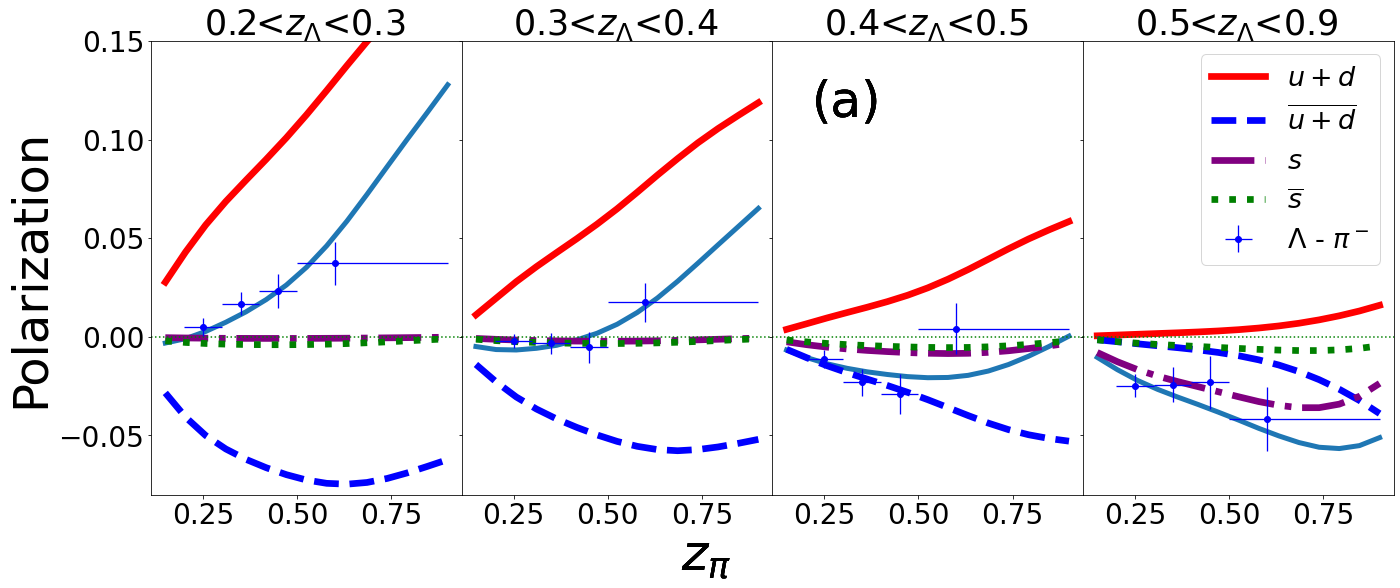

In [8]:
fig2, axes = plt.subplots(1,4)
z1=[0.25,.35,.45,.6]
lim=[-0.08,0.15]
#lim=[-0.06,0.15]

ct=1

z_err =[[0.05,0.05,0.05,0.1],[0.05,0.05,0.05,0.3]]

for zs,ax in zip(z1,axes):
	
	#fig2.suptitle('$\Lambda$ - $\pi^-$',fontsize=30)	
	dt = dati_lp.loc[(dati_lp['had1']==300) & (dati_lp['z1']==zs)& (dati_lp['had2']==105)]

	pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==105)]	

	ax=plt.subplot(1,4,ct)
	ax.plot(dt.z2,dt.conv,label='_nolegend_',linewidth=fit_l-2.)

	ax.plot(dt.z2,dt.ffs1,label='$u+d$',linewidth=fit_l-0.3,linestyle='-',color='red')
	ax.plot(dt.z2,dt.ffs2,label='$\overline{u+d}$',linewidth=fit_l-0.3,linestyle='--',color='blue')
	ax.plot(dt.z2,dt.ffs3,label='$s$',linewidth=fit_l-0.3,linestyle='-.',color='purple')
	ax.plot(dt.z2,dt.ffs4,label='$\overline{s}$',linewidth=fit_l-0.3,linestyle=':',color='green')

#	ax.plot(dt.z2,dt.ffs1,label='up',linewidth=fit_l-0.3,linestyle='-',color='red')
#	ax.plot(dt.z2,dt.ffs2,label='down',linewidth=fit_l-0.3,linestyle='--',color='blue')
#	ax.plot(dt.z2,dt.ffs3,label='strange',linewidth=fit_l-0.3,linestyle='-.',color='purple')
#	ax.plot(dt.z2,dt.ffs4,label='sea',linewidth=fit_l-0.3,linestyle=':',color='green')
    
    
	axhline(linewidth=1.5, ls=':', color='g')

	ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=6, color='blue',elinewidth=ers_bar, label= '$\Lambda$ - $\pi^-$')



	if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1.)
	if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1.)
	if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1.)
	if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1.)

	ax.tick_params(axis='both', which='major', labelsize=28)
	if ct >1: ax.set_yticklabels([])
	
	if ct ==1 :ylabel('Polarization',size=y_lbl) 
	if ct ==4 :legend(loc='upper right', fontsize=leg_sz,frameon=True) 

	ax.set_ylim(lim)
	ct+=1
	fig2.text(0.5, 0.1, r'$z_{\pi}$', ha='center',size=x_lbl)
	fig2.text(0.6, 0.7, '(a)', ha='center',size=x_lbl)
fig2.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig2.set_size_inches(19.5, 10.5, forward=True)



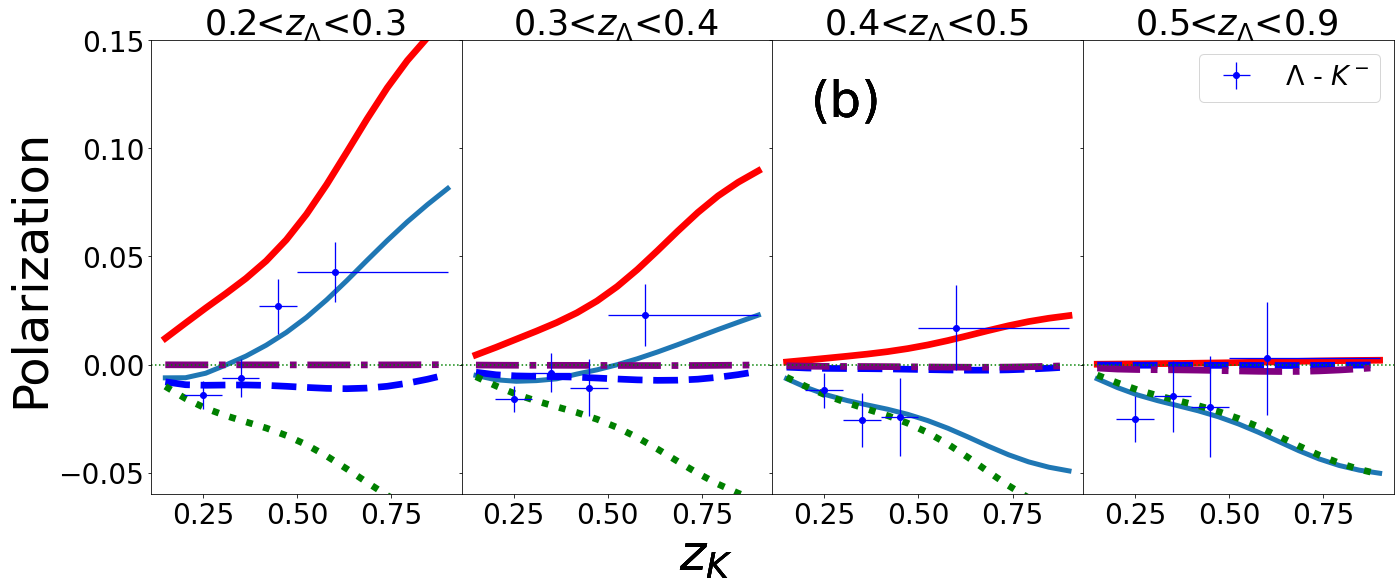

In [9]:
fig3, axes = plt.subplots(1,4)
z1=[0.25,.35,.45,.6]
lim=[-0.06,0.15]
ct=1

z_err =[[0.05,0.05,0.05,0.1],[0.05,0.05,0.05,0.3]]

for zs,ax in zip(z1,axes):
	
	#fig3.suptitle('$\Lambda$ - $K^-$',fontsize=30)	
	dt = dati_lk.loc[(dati_lk['had1']==300) & (dati_lk['z1']==zs)& (dati_lk['had2']==205)]

	pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==205)]	

	ax=plt.subplot(1,4,ct)
	ax.plot(dt.z2,dt.conv,label='_nolegend_',linewidth=fit_l-2.)

	ax.plot(dt.z2,dt.ffs1,label='_nolegend_',linewidth=fit_l-0.3,linestyle='-',color='red')
	ax.plot(dt.z2,dt.ffs2,label='_nolegend_',linewidth=fit_l-0.3,linestyle='--',color='blue')
	ax.plot(dt.z2,dt.ffs3,label='_nolegend_',linewidth=fit_l-0.3,linestyle='-.',color='purple')
	ax.plot(dt.z2,dt.ffs4,label='_nolegend_',linewidth=fit_l-0.3,linestyle=':',color='green')
	axhline(linewidth=1.5, ls=':', color='g')

	ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=6, color='blue',elinewidth=ers_bar, label= '$\Lambda$ - $K^-$')



	if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=1.)
	if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=1.)
	if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=1.)
	if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=1.)

	ax.tick_params(axis='both', which='major', labelsize=28)
	if ct >1: ax.set_yticklabels([])
	
	if ct ==1 :ylabel('Polarization',size=y_lbl) 
	if ct ==4 :legend(loc='upper right', fontsize=leg_sz,frameon=True) 

	ax.set_ylim(lim)
	ct+=1
	fig3.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
	fig3.text(0.6, 0.7, '(b)', ha='center',size=x_lbl)
fig3.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig3.set_size_inches(19.5, 10.5, forward=True)


In [10]:
fig.savefig('Lb_pi_p_partial_chi_'+str(chi)+'.pdf')
fig.savefig('Lb_pi_p_partial_chi_'+str(chi)+'.png')


fig1.savefig('Lb_k_p_partial_chi_'+str(chi)+'.pdf')
fig1.savefig('Lb_k_p_partial_chi_'+str(chi)+'.png')



fig2.savefig('Lb_pi_m_partial_chi_'+str(chi)+'.pdf')
fig2.savefig('Lb_pi_m_partial_chi_'+str(chi)+'.png')


fig3.savefig('Lb_k_m_partial_chi_'+str(chi)+'.pdf')
fig3.savefig('Lb_k_m_partial_chi_'+str(chi)+'.png')
